<a href="https://colab.research.google.com/github/VikramJ12/Fibre-Optic-Communication/blob/main/Base_code_AOC_ML_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Tx: BPSK Modulation

x ∈ {+1, -1}, 1 bit per symbol

Pr(x = ±1) = 1/2

Generate N BPSK symbols randomly

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np

N = 100

def generate_bpsk_symbols(N):

  return np.array(symbols)

psk_symbols = generate_bpsk_symbols(N)

#
plt.figure(figsize=(8, 6))
plt.scatter(psk_symbols.real, psk_symbols.imag, marker='o', color='blue', label='PSK Symbols')
plt.xlabel('Real values')
plt.ylabel('Imaginary alues')
plt.title('PSK Modulation Scatter Plot')
plt.grid(True)
plt.legend()
plt.show()

# 2. Channel: Generating Additive Noise

Typically noise is considered to be i.i.d. samples of a zero-mean Gaussian random variable. The variance of this random variable determines the energy/power in noise.

w ~ $\mathcal{N}(0,\sigma^2)$

noise power = 20 log σ

Received signal is
$y = x + w$

In [ ]:


SNRdB = 8;

def add_noise(symbols, SNRdB):

  noise =
  noisy_symbols = symbols + noise

  return noisy_symbols

noisy_symbols = add_noise(psk_symbols, SNRdB)


#
plt.figure(figsize=(8, 6))
plt.scatter(noisy_symbols.real, noisy_symbols.imag, marker='o', color='blue', label='PSK Symbols + Noise')
plt.xlabel('Real values')
plt.ylabel('Imaginary alues')
plt.title('Noisy symbols')
plt.grid(True)
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()

#2.1 Channel: Creating a Non-linear Medium

The propagation medium (or the amplifier response) can be non-linear.

$y_{NL} = g(y) = g(x + w)$

A simple model of the non-linearity can be a polynomial (e.g., Taylor series expansion).
$g(y) = \sum_{i=0}^L a_iy^i$



2.1.1 Generate a non-linear channel

$g(y)=1.5\tanh(y/1.5)$

In [ ]:
# prompt: create a polynomial function

def non_linear_channel(input):
  output = 1.5*np.tanh(input/1.5)
  return output

y_values = np.arange(-1, 2, 0.5)
y_nl_values =  non_linear_channel(y_values)

plt.figure(figsize=(8, 6))
plt.plot(y_values, y_nl_values, label='Output amplitude')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Non-linear channel response')
plt.grid(True)
plt.legend()
plt.show()

2.1.2 Perform linear regression to model the non-linear channel using polynomials

$\mathbf{a} = \arg\min_{\bf a} \|{\bf y - Pa}\|^2 + \lambda \|{\bf a}\|^2$

In [ ]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def polynomial_regression(training_data, training_label, testing_data, degree):
    # Create polynomial features

    return testing_label, polyreg

def polynomial_function(y, coefficients):
  return output


degree = 5

#Produce unseen data
yy_values = np.arange(-2, 2, 0.05)
yy_nl_values = non_linear_channel(yy_values)

y_pred, model = polynomial_regression(y_nl_values, y_values, yy_nl_values, degree)

linear_model = model.named_steps['linearregression']
coefficients = linear_model.coef_

print(coefficients)

#Plot the result
plt.figure(figsize=(8, 6))
plt.scatter(yy_nl_values, yy_values, marker='o', color='blue', label='Inverse function')
plt.plot(yy_values, y_pred, color='black', label=f'Predicted output vs truth')
plt.plot(yy_values, polynomial_function(yy_values, coefficients), color='red', label=f'Polynomial Regression (degree={degree})')
plt.xlabel('Real values')
plt.ylabel('Imaginary values')
plt.title('Polynomial Regression Fit')
plt.grid(True)
plt.legend()
plt.show()


2.1.3 Pass the noisy signal through the non-linear channel to get $y_{NL}$

In [ ]:
symbols = noisy_symbols

nl_distorted_symbols = non_linear_channel(symbols.real) + 1j*non_linear_channel(symbols.imag)

#
plt.figure(figsize=(8, 6))
plt.scatter(nl_distorted_symbols.real, nl_distorted_symbols.imag, marker='o', color='blue', label='Symbols')
plt.xlabel('Real values')
plt.ylabel('Imaginary alues')
plt.title('Disrorted symbols')
plt.grid(True)
plt.legend()
plt.show()

2.1.4 Equalize for the channel

In [ ]:
equalized_signal = model.predict(nl_distorted_symbols.real.reshape(-1,1,)) + 1j*model.predict(nl_distorted_symbols.imag.reshape(-1,1,))

#
plt.figure(figsize=(8, 6))
plt.scatter(equalized_signal.real, equalized_signal.imag, marker='o', color='blue', label='Symbols')
plt.xlabel('Real values')
plt.ylabel('Imaginary alues')
plt.title('Equalized symbols')
plt.grid(True)
plt.legend()
plt.show()

# 3. Rx: Demodulation

ML or MAP demodulation (for equally likely symbols) is the symbol that has the least distance from the received symbols.

$\hat{x} = \arg\min_{x\in\{\pm 1\}} |x - y|$

Bit error rate is the average number of bits in error $\frac{\sum_{i=1}^NI(x\neq\hat{x})}{N}$

In [ ]:
# 3. Demodulation

constellation = [-1, 1]

def demodulate(noisy_symbols, constellation):
  return demodulated_symbols



def find_BER_BPSK(demodulated_symbols, psk_symbols):
  return ber

demodulated_symbols = demodulate(noisy_symbols, constellation)
ber = find_BER_BPSK(demodulated_symbols, psk_symbols)

print(f"Bit Error Rate (BER): {ber}")

plt.figure(figsize=(8, 6))
plt.scatter(demodulated_symbols.real, demodulated_symbols.imag, marker='o', color='blue', label='Demodulated Symbols')
plt.xlabel('Real values')
plt.ylabel('Imaginary alues')
plt.title('Demodulated Symbols')
plt.grid(True)
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()

# 3.1 Rx: SVM Classifier

Learn a hyperplane that separates the two BPSK symbols. The normal to the hyperplane is given by

${\mathbf w} = \arg\max_{\mathbf w} \min_i ~c_i(\mathbf{x}^T\frac{{\mathbf w}}{\|{\mathbf w}\|}+w_0)$

In [ ]:

from sklearn.svm import SVC


X = np.column_stack((noisy_symbols.real, noisy_symbols.imag))  # Features: real and imaginary parts
y = psk_symbols

# Train SVM classifier


# Prediction using the trained model

# Evaluate the classifier

# Calculate BER based on SVM predictions

# Plotting

# Plot decision boundary (optional, might not work well for non-linear kernels)

plt.xlabel('Real values')
plt.ylabel('Imaginary alues')
plt.title('SVM classification of BPSK data')
plt.grid(True)
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()

# 3.2 Rx: Neural Network Classifier for BPSK


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense

def create_neural_network(training_data, training_label, num_classes):
  # Assuming X and y are defined from the previous code

  # Convert labels to categorical format if needed
  #symbols_categorical = keras.utils.to_categorical(np.where(training_label == 1, 1, 0), num_classes=2)


  # Create the neural network model

  # Compile the model


  # Train the model

  # Evaluate the model

  return nn_model


training_data = noisy_symbols
training_label = keras.utils.to_categorical(np.where(psk_symbols == 1, 1, 0), num_classes=2)


nn_model = create_neural_network(training_data, training_label, 2)

# Make predictions
predictions = nn_model.predict(np.column_stack((training_data.real, training_data.imag)))
predicted_classes = np.argmax(predictions, axis=1)
predicted_symbols_nn = np.where(predicted_classes == 1, 1, -1)

#Calculate BER
ber_nn = np.sum(psk_symbols != predicted_symbols_nn) / N
print(f"Bit Error Rate (BER) using Neural Network: {ber_nn}")



Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5400 - loss: 0.6987
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7700 - loss: 0.6655
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 1.0000 - loss: 0.6345
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 1.0000 - loss: 0.6047
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 1.0000 - loss: 0.5761
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 1.0000 - loss: 0.5492
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 0.5237
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 0.4998
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 1.0000 - loss: 0.4772
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 0.4558
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.4367  
Test Loss: 0.4352
Test Accuracy: 1.0000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Bit Error Rate (BER)

# 4. Link BER Performance

Run the entire process multiple times for different values of SNR and observe the BER performance.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


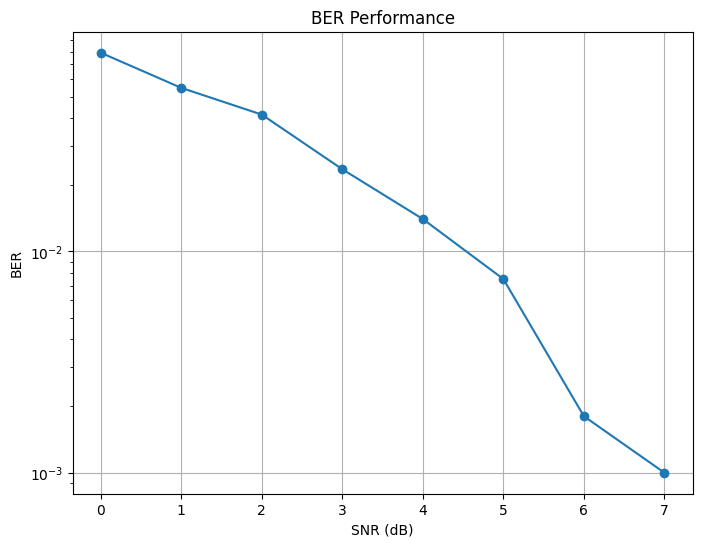

In [ ]:
SNRdB_values = range(0, 8)
ber_values = []
N = 10**4

for SNRdB in SNRdB_values:
  psk_symbols = generate_bpsk_symbols(N)
  noisy_symbols = add_noise(psk_symbols, SNRdB)

  X = np.column_stack((noisy_symbols.real, noisy_symbols.imag))
  predictions = nn_model.predict(X)
  predicted_classes = np.argmax(predictions, axis=1)
  demodulated_symbols = np.where(predicted_classes == 1, 1, -1)

  #demodulated_symbols = demodulate(noisy_symbols, constellation)
  #demodulated_symbols = svm_classifier.predict(np.column_stack((noisy_symbols.real, noisy_symbols.imag)))


  ber = find_BER_BPSK(demodulated_symbols, psk_symbols)
  ber_values.append(ber)

plt.figure(figsize=(8, 6))
plt.semilogy(SNRdB_values, ber_values, marker='o', linestyle='-')
plt.xlabel('SNR (dB)')
plt.ylabel('BER')
plt.title('BER Performance')
plt.grid(True)
plt.show()